## Dependencias

In [1]:
import seaborn
import pandas
import geopandas
from pysal.lib import weights
import numpy
import matplotlib.pyplot as plt

## Data

In [2]:
medellin = geopandas.read_file("data/limite_barrio_vereda_cata.geojson")

In [3]:
medellin.head()

,OBJECTID,comuna,barrio,codigo,nombre_barrio,indicador_ur,sector,nombre_comuna,fecha_sincronizacion,Shape_Length,Shape_Area,geometry
0,1,50,87,5087,Suburbano Potrera Miserenga,R,7,PALMITAS,1714529701000,10793.745904,1.112742e+06,"POLYGON ((4702200.304 2261423.185, 4702194.246..."
1,2,90,08,9008,Piedras Blancas,R,9,SANTA ELENA,1714529701000,28242.883995,1.173412e+07,"POLYGON ((4719822.945 2254827.749, 4719821.769..."
2,3,08,06,0806,Llanaditas,U,3,VILLA HERMOSA,1714529701000,3770.603451,2.638531e+05,"POLYGON ((4719157.189 2250063.198, 4719157.181..."
3,4,60,06,6006,La Cuchilla,R,7,SAN CRISTOBAL,1714529701000,5659.422464,6.306618e+05,"POLYGON ((4705777.892 2254965.265, 4705777.499..."
4,5,14,11,1411,Los Balsos No.1,U,5,EL POBLADO,1714529701000,6185.278317,1.426434e+06,"POLYGON ((4717311.158 2242869.355, 4717311.146..."


In [4]:
medellin.describe()

,OBJECTID,sector,fecha_sincronizacion,Shape_Length,Shape_Area
count,349.000000,349.000000,3.490000e+02,349.000000,3.490000e+02
mean,175.000000,4.220630,1.714530e+12,4888.895067,1.079700e+06
std,100.891856,2.509758,0.000000e+00,5350.967479,2.488714e+06
min,1.000000,1.000000,1.714530e+12,257.367765,2.754026e+03
25%,88.000000,2.000000,1.714530e+12,2512.350155,2.347123e+05
50%,175.000000,4.000000,1.714530e+12,3220.970268,3.711839e+05
75%,262.000000,6.000000,1.714530e+12,4375.363056,6.204005e+05
max,349.000000,9.000000,1.714530e+12,38723.006984,1.710786e+07


## Pesos de contigüidad

### Contigüidad de torre

In [5]:
wr = weights.contiguity.Rook.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_89473/1801246121.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wr = weights.contiguity.Rook.from_dataframe(medellin)
/Users/ortega/Documents/software/clases/Geographic_Data_Science_with_Python/.venv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 107.
  W.__init__(self, neighbors, ids=ids, **kw)


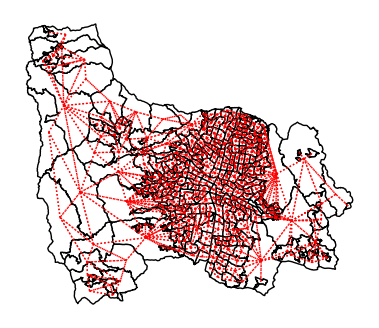

In [6]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
wr.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [7]:
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,339,340,341,342,343,344,345,346,347,348
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
wr.nonzero

1856

In [13]:
wr.neighbors

{0: [99, 136, 282, 157, 222],
 1: [2,
  201,
  10,
  11,
  268,
  14,
  16,
  274,
  278,
  342,
  156,
  223,
  163,
  41,
  303,
  176,
  177,
  50,
  310,
  311,
  319],
 2: [1, 267, 156, 41],
 3: [192, 279, 140, 189, 191],
 4: [257, 120, 106, 251, 30, 159],
 5: [49, 312, 235, 317, 158],
 6: [97, 292, 245, 150, 168, 77],
 7: [16, 13, 276, 285],
 8: [273, 114, 55, 23, 124],
 9: [66, 71, 153, 298, 47],
 10: [1, 57, 156, 45, 14],
 11: [16, 1, 50, 276, 263],
 12: [195, 327, 154, 237, 15],
 13: [16, 177, 18, 7, 285, 63],
 14: [1, 310, 57, 10, 109],
 15: [327, 329, 154, 12, 141],
 16: [1, 177, 276, 7, 11, 13],
 17: [297, 322, 27],
 18: [258, 19, 285, 90, 44, 13, 63],
 19: [193, 44, 142, 18, 312, 90, 221, 31],
 20: [309, 198, 71, 214, 250, 220],
 21: [224, 217, 314, 265],
 22: [66, 165, 106, 71, 250, 295],
 23: [302, 55, 8, 200, 286, 127],
 24: [96, 339, 182, 347, 253, 318, 111],
 25: [98, 84, 327, 216, 329, 187],
 26: [163, 260, 101, 105, 106],
 27: [17, 322, 296, 297, 29, 254, 271],
 28:

<Axes: ylabel='Frequency'>

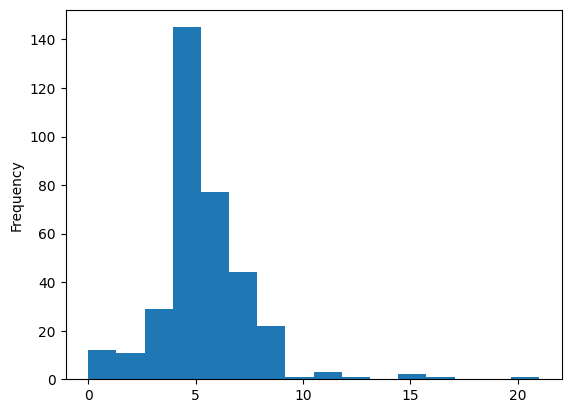

In [8]:
s = pandas.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0])

In [9]:
s[s > 15]

1      21
146    16
dtype: int64

### Contigüidad de reina

In [14]:
w_queen = weights.contiguity.Queen.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_89473/3199273579.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.contiguity.Queen.from_dataframe(medellin)
/Users/ortega/Documents/software/clases/Geographic_Data_Science_with_Python/.venv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 107.
  W.__init__(self, neighbors, ids=ids, **kw)


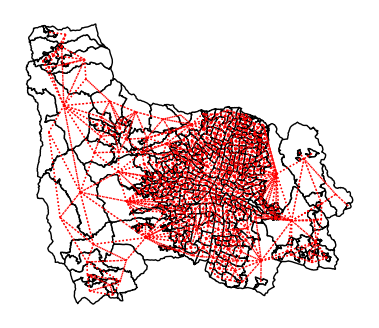

In [15]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
w_queen.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [16]:
print(w_queen.n)
print(w_queen.pct_nonzero) # Porcentaje de elementos distintos de cero

349
1.6173923038398699


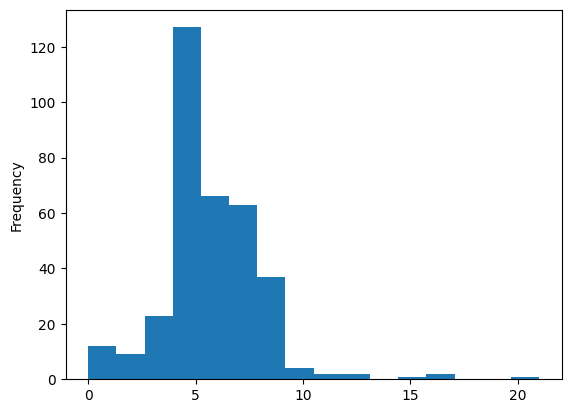

In [17]:
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

In [18]:
s[s > 15]

1      21
146    16
163    16
dtype: int64

In [19]:
medellin.iloc[163]

OBJECTID                                                              164
comuna                                                                 90
barrio                                                                 05
codigo                                                               9005
nombre_barrio                                                  Media Luna
indicador_ur                                                            R
sector                                                                  9
nombre_comuna                                                 SANTA ELENA
fecha_sincronizacion                                        1714529701000
Shape_Length                                                 21041.959806
Shape_Area                                                 11118541.80888
geometry                POLYGON ((4722012.3610000005 2249387.139500001...
Name: 163, dtype: object

## Pesos basados en distancia

### k vecinos mas cercanos

In [15]:

wk4 = weights.distance.KNN.from_dataframe(medellin, k=4)

In [16]:
# Número de identificadores sin vecinos
wk4.islands

[]

In [17]:
# Los vecinos mas cercanos serian
wk4.neighbors

{0: [157, 99, 222, 103],
 1: [201, 319, 2, 310],
 2: [267, 41, 156, 266],
 3: [189, 140, 192, 191],
 4: [120, 251, 257, 30],
 5: [235, 49, 158, 312],
 6: [292, 77, 245, 124],
 7: [285, 16, 13, 258],
 8: [23, 55, 273, 286],
 9: [298, 47, 153, 71],
 10: [14, 156, 57, 45],
 11: [276, 263, 7, 16],
 12: [15, 237, 329, 195],
 13: [7, 285, 16, 177],
 14: [10, 109, 310, 156],
 15: [12, 141, 329, 331],
 16: [7, 13, 285, 177],
 17: [297, 27, 322, 29],
 18: [90, 13, 258, 63],
 19: [142, 193, 31, 90],
 20: [250, 198, 220, 214],
 21: [244, 314, 118, 249],
 22: [250, 66, 295, 20],
 23: [286, 8, 273, 127],
 24: [318, 111, 253, 132],
 25: [327, 216, 84, 329],
 26: [101, 315, 260, 316],
 27: [17, 29, 297, 254],
 28: [342, 67, 59, 1],
 29: [27, 271, 254, 17],
 30: [159, 261, 242, 184],
 31: [312, 193, 317, 19],
 32: [137, 272, 219, 91],
 33: [188, 189, 275, 96],
 34: [257, 106, 4, 251],
 35: [113, 310, 109, 280],
 36: [321, 231, 151, 230],
 37: [237, 113, 280, 12],
 38: [243, 39, 304, 336],
 39: [38, 16

### Pesos de kernel
Reflejan el caso en el que se supone o se espera que la similitud o proximidad espacial disminuya con la distancia (pero ademas con una función de decaimiento).

In [18]:
w_kernel = weights.distance.Kernel.from_dataframe(medellin)

In [19]:
# Función de kernel implementada
w_kernel.function

'triangular'

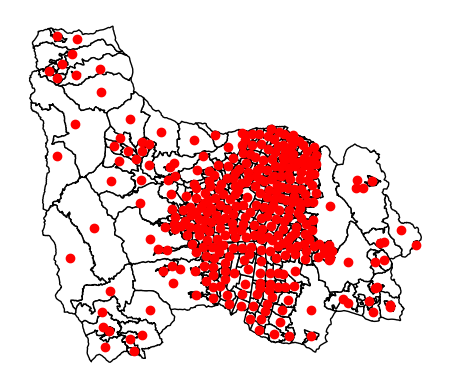

In [20]:
# Centroides
# Plot polygons
ax = medellin.plot(facecolor="w", edgecolor="k")
# Create and plot centroids
medellin.centroid.plot(color="r", ax=ax)
# Remove axis
ax.set_axis_off();

In [21]:
# Build weights with adaptive bandwidth
w_adaptive = weights.distance.Kernel.from_dataframe(
    medellin, fixed=False, k=25
)
# Para las observaciones separadas por distancias mayores que el ancho de banda, los pesos se establecen en cero

In [22]:
w_adaptive.bandwidth[:5]

array([[10448.33616032],
       [ 2744.5768786 ],
       [ 2054.71012625],
       [ 5089.76748674],
       [ 3458.15551226]])

In [23]:
# Pesos para el elemento 17 con otros elementos
w_adaptive[17]

{17: 1.0,
 297: 0.9016186231103032,
 27: 0.8467326922488215,
 322: 0.8270512477694171,
 29: 0.695379464085178,
 254: 0.6749748398885239,
 89: 0.6285525497237894,
 271: 0.502893491617225,
 234: 0.49463750081115176,
 183: 0.44896432031279565,
 296: 0.4156886651662344,
 287: 0.36706140607766646,
 255: 0.3246517819912743,
 233: 0.2769254239223802,
 227: 0.2651486733497571,
 49: 0.26013170931061036,
 212: 0.209596279903558,
 283: 0.19263394079927576,
 323: 0.15282841448658757,
 145: 0.1503239581614504,
 209: 0.06362476954795393,
 5: 0.049202478446175535,
 199: 0.04577019767212964,
 235: 0.04131676679493235,
 115: 0.004738305328344405,
 158: 9.99999901774018e-08}

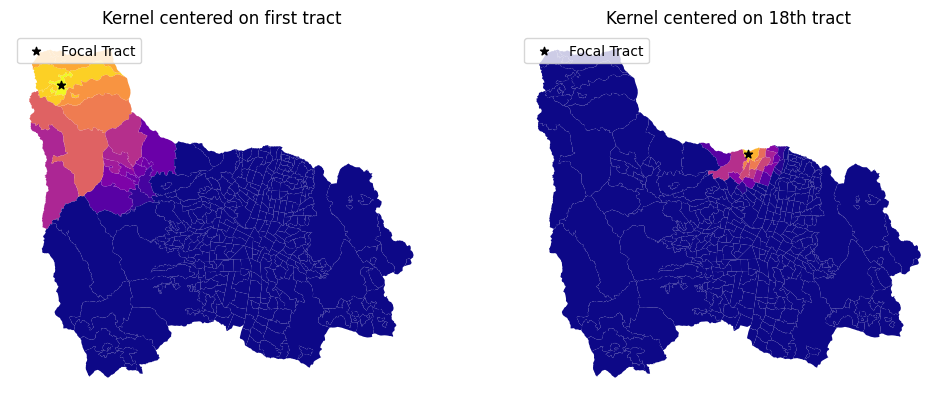

In [24]:
# Create full matrix version of weights
full_matrix, ids = w_adaptive.full()
# Set up figure with two subplots in a row
f, ax = plt.subplots(
    1, 2, figsize=(12, 6), subplot_kw=dict(aspect="equal")
)
# Append weights for first polygon and plot on first subplot
medellin.assign(weight_0=full_matrix[0]).plot(
    "weight_0", cmap="plasma", ax=ax[0]
)
# Append weights for 18th polygon and plot on first subplot
medellin.assign(weight_18=full_matrix[17]).plot(
    "weight_18", cmap="plasma", ax=ax[1]
)
# Add centroid of focal tracts
medellin.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="k", label="Focal Tract"
)
medellin.iloc[[17], :].centroid.plot(
    ax=ax[1], marker="*", color="k", label="Focal Tract"
)
# Add titles
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc="upper left") for ax_ in ax]

## Fuentes de datos

- `https://www.medellin.gov.co/geomedellin/datosAbiertos?id=1044`